In [2]:
#Imports necesarios durante toda la practica

In [199]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import argparse
import locale
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation, concatenate, Dropout, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

print(tf.__version__)

2.8.2


**Carga de datos**

In [147]:
#Descargamos el data set
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2022-06-12 20:32:08--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [   <=>              ]  54.31M  2.83MB/s    in 19s     

2022-06-12 20:32:28 (2.92 MB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [148]:
#Listamos directorio para ver que hemos descargado correctamente el DataSet
!ls -lah

total 55M
drwxr-xr-x 1 root root 4.0K Jun 12 15:21 .
drwxr-xr-x 1 root root 4.0K Jun 12 15:18 ..
-rw-r--r-- 1 root root  55M Jun 12 20:32 airbnb-listings.csv
drwxr-xr-x 4 root root 4.0K Jun  1 13:49 .config
drwx------ 5 root root 4.0K Jun 12 15:21 drive
drwxr-xr-x 1 root root 4.0K Jun  1 13:50 sample_data


**Procesamiento de datos**

In [149]:
#Hacemos algunas comprobaciones para ver que lo hemos cargado correctamente
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.41010608050749,-3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.69,"40.416968822636726,-3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."
2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,-,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.60,"40.40970517560235,-3.7135611928841086","Host Has Profile Pic,Host Identity Verified,Is..."
3,9832499,https://www.airbnb.com/rooms/9832499,20170407214119,2017-04-08,PLAZA DE ESPAÑA - Único - Gimnasio.,"Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...",none,NaN,...,10.0,10.0,10.0,VT-1520,NaN,strict,9,3.56,"40.42319271738103,-3.7112486513892","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,1868170,https://www.airbnb.com/rooms/1868170,20170407214119,2017-04-08,"Loft/duplex 150m2, 3 double rooms","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...",none,NaN,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.13,"40.416513932601625,-3.7178427529546973","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [150]:
#comprobamos el tamaño del data set inicial
data.shape

(14001, 89)

In [151]:
#listamos las columnas
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [152]:
#metodo que utilizaremos para elimianr columanas del data frame
def drop_colums_dataframe(df, drop_colums):
    
    df = df.drop(drop_colums, axis=1)
    
    return df

In [153]:
print(f'El juego de datos con el que comenzamos a trabajar tiene:')
print(f'- {data.shape[0]} filas')
print(f'- {data.shape[1]} columnas')

El juego de datos con el que comenzamos a trabajar tiene:
- 14001 filas
- 89 columnas


In [154]:
#Comprobamos que tipo de datos tenemos en las columnas 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14001 entries, 0 to 14000
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14001 non-null  int64  
 1   Listing Url                     14001 non-null  object 
 2   Scrape ID                       14001 non-null  int64  
 3   Last Scraped                    14001 non-null  object 
 4   Name                            14001 non-null  object 
 5   Summary                         13451 non-null  object 
 6   Space                           10306 non-null  object 
 7   Description                     13995 non-null  object 
 8   Experiences Offered             14001 non-null  object 
 9   Neighborhood Overview           8630 non-null   object 
 10  Notes                           5288 non-null   object 
 11  Transit                         8552 non-null   object 
 12  Access                          

In [155]:
#eliminamos las siguientes columnas que considero que no aportan
drop_colum = ['ID','Scrape ID','Last Scraped','Name','Summary','Space','Description','Neighborhood Overview','Host Total Listings Count',
             'Notes','Transit','Access','Interaction','House Rules','Listing Url','Medium Url','Picture Url','XL Picture Url','Host ID',
             'Host URL','Host Name','Host Since','Host Location','Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url',
             'Host Neighbourhood','Host Listings Count','Host Verifications','Street','Neighbourhood','Neighbourhood Group Cleansed',
             'City', 'State', 'Zipcode', 'Market','Smart Location','Country Code', 'Country', 'Latitude', 'Longitude','Amenities','Weekly Price','Monthly Price','Security Deposit',
             'Calendar Updated','Has Availability','Availability 30','Availability 60','Availability 90',
             'Availability 365','Calendar last Scraped','First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication',
             'Review Scores Location','Review Scores Value','License','Jurisdiction Names','Calculated host listings count','Reviews per Month','Geolocation','Features',
             'Minimum Nights', 'Maximum Nights']

data = drop_colums_dataframe(data, drop_colum)

# tras uno de los comentarios que hiciste eliminé las columnas que yo no tenia eliminadas
drop_colum2 = ['Experiences Offered','Neighbourhood Cleansed','Bed Type','Square Feet','Cleaning Fee','Review Scores Rating']
data = drop_colums_dataframe(data, drop_colum2)

In [156]:
# El nuevo tamaño es 
data.shape

(14001, 12)

In [157]:
data.head()

,Thumbnail Url,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Number of Reviews,Cancellation Policy
0,https://a0.muscache.com/im/pictures/40713802/3...,Apartment,Private room,2,1.0,1.0,1.0,36.0,1,0,80,flexible
1,https://a0.muscache.com/im/pictures/44239584/c...,Apartment,Entire home/apt,2,1.0,1.0,1.0,85.0,1,0,90,strict
2,https://a0.muscache.com/im/pictures/84378550/f...,Apartment,Private room,2,1.0,1.0,1.0,20.0,1,10,20,flexible
3,https://a0.muscache.com/im/pictures/be441d1f-4...,Apartment,Entire home/apt,4,1.0,1.0,2.0,112.0,2,5,55,strict
4,https://a0.muscache.com/im/pictures/c232f016-f...,Apartment,Entire home/apt,8,3.0,3.0,4.0,190.0,6,40,46,moderate


In [158]:
# miramos las columnas que contienen valores NaN
data.isnull().sum(axis=0)

Thumbnail Url          2712
Property Type             0
Room Type                 0
Accommodates              0
Bathrooms                52
Bedrooms                 24
Beds                     49
Price                    11
Guests Included           0
Extra People              0
Number of Reviews         0
Cancellation Policy       0
dtype: int64

In [159]:
#Las variables que contienen NaN vamos a utilizar la moda para inicializarlos
data = data.fillna(value={"Bathrooms":data["Bathrooms"].mode()[0]})
data = data.fillna(value={"Bedrooms":data["Bedrooms"].mode()[0]})
data = data.fillna(value={"Beds":data["Beds"].mode()[0]})
data = data.fillna(value={"Price":data["Price"].mode()[0]})

#las que no tienen imagen las eliminamos tambien
data = data.dropna()

In [160]:
#comprobamos que no hay valores NaN
data.isnull().sum(axis=0)

Thumbnail Url          0
Property Type          0
Room Type              0
Accommodates           0
Bathrooms              0
Bedrooms               0
Beds                   0
Price                  0
Guests Included        0
Extra People           0
Number of Reviews      0
Cancellation Policy    0
dtype: int64

In [161]:
# el nuevo tamaño es
data.shape

(11289, 12)

In [162]:
#comprobaremos la distribucion de los datos de las variables seleccionadas
#y nos quedaremos con valores que aporten al conjunto, los valores que se repiten poco los eliminamo
def delete_data (df, uniques, counts, var, limit):
  for (uniques, count) in zip(uniques, counts):
    if count < limit:
      idxs = df[df[var] == uniques].index
      df.drop(idxs, inplace=True)
  return df


propertyTypes = data["Property Type"].value_counts().keys().tolist()
propertyTypeCounts = data["Property Type"].value_counts().tolist()
print(f'Tipos de propiedades: {propertyTypes}')
print(f'Cantidad: {propertyTypeCounts}')

data = delete_data(data, propertyTypes, propertyTypeCounts, "Property Type", 100)



roomType = data["Room Type"].value_counts().keys().tolist()
roomTypeCounts = data["Room Type"].value_counts().tolist()
print(f'Tipos de habitacion: {roomType}')
print(f'Cantidad: {roomTypeCounts}')



accommodates = data["Accommodates"].value_counts().keys().tolist()
accommodatesCounts = data["Accommodates"].value_counts().tolist()
print(f'Número de inquilinos: {accommodates}')
print(f'Cantidad: {accommodatesCounts}')

data = delete_data(data, accommodates, accommodatesCounts, "Accommodates", 100)



bathrooms = data["Bathrooms"].value_counts().keys().tolist()
bathroomsCounts = data["Bathrooms"].value_counts().tolist()
print(f'Número de baños: {bathrooms}')
print(f'Cantidad: {bathroomsCounts}')

data = delete_data(data, bathrooms, bathroomsCounts, "Bathrooms", 100)



bedrooms = data["Bedrooms"].value_counts().keys().tolist()
bedroomsCounts = data["Bedrooms"].value_counts().tolist()
print(f'Número de habitaciones: {bedrooms}')
print(f'Cantidad: {bedroomsCounts}')

data = delete_data(data, bedrooms, bedroomsCounts, "Bedrooms", 100)



beds = data["Beds"].value_counts().keys().tolist()
bedsCounts = data["Beds"].value_counts().tolist()
print(f'Número de camas: {beds}')
print(f'Cantidad: {bedsCounts}')

data = delete_data(data, beds, bedsCounts, "Beds", 100)



guestsIncluded = data["Guests Included"].value_counts().keys().tolist()
guestsIncludedCounts = data["Guests Included"].value_counts().tolist()
print(f'Invitados incluidos: {guestsIncluded}')
print(f'Cantidad: {guestsIncludedCounts}')

data = delete_data(data, guestsIncluded, guestsIncludedCounts, "Guests Included", 100)



extraPeople = data["Extra People"].value_counts().keys().tolist()
extraPeopleCounts = data["Extra People"].value_counts().tolist()
print(f'Persona extra: {extraPeople}')
print(f'Cantidad: {extraPeopleCounts}')

data = delete_data(data, extraPeople, extraPeopleCounts, "Extra People", 50)



numberReviews = data["Number of Reviews"].value_counts().keys().tolist()
numberReviewsCounts = data["Number of Reviews"].value_counts().tolist()
print(f'Número de revisiones: {numberReviews}')
print(f'Cantidad: {numberReviewsCounts}')

data = delete_data(data, numberReviews, numberReviewsCounts, "Number of Reviews", 30)



cancellationPolicy = data["Cancellation Policy"].value_counts().keys().tolist()
cancellationPolicyCounts = data["Cancellation Policy"].value_counts().tolist()
print(f'Politica de cancelación: {cancellationPolicy}')
print(f'Cantidad: {cancellationPolicyCounts}')

data = delete_data(data, cancellationPolicy, cancellationPolicyCounts, "Cancellation Policy", 50)

Tipos de propiedades: ['Apartment', 'House', 'Bed & Breakfast', 'Condominium', 'Loft', 'Other', 'Guesthouse', 'Dorm', 'Chalet', 'Hostel', 'Serviced apartment', 'Townhouse', 'Villa', 'Boutique hotel', 'Casa particular', 'Earth House', 'Guest suite', 'Camper/RV', 'Timeshare', 'Boat', 'Bungalow', 'Tent']
Cantidad: [9123, 960, 320, 297, 232, 191, 39, 35, 24, 16, 13, 10, 9, 6, 3, 3, 3, 1, 1, 1, 1, 1]
Tipos de habitacion: ['Entire home/apt', 'Private room', 'Shared room']
Cantidad: [6256, 4708, 159]
Número de inquilinos: [2, 4, 1, 3, 6, 5, 8, 7, 10, 9, 12, 16, 11, 14, 13, 15]
Cantidad: [4120, 2337, 1748, 1052, 840, 489, 212, 134, 69, 40, 36, 22, 12, 8, 3, 1]
Número de baños: [1.0, 2.0, 1.5, 3.0, 2.5, 0.5, 0.0, 5.0, 4.0, 4.5, 6.0, 3.5, 5.5]
Cantidad: [8436, 1665, 378, 177, 73, 52, 50, 36, 24, 16, 13, 10, 2]
Número de habitaciones: [1.0, 2.0, 0.0, 3.0, 4.0, 5.0, 6.0]
Cantidad: [7442, 1817, 706, 599, 84, 7, 1]
Número de camas: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 7.0, 10.0]
Cantidad: [5651, 2808

In [163]:
#el nuevo tamaño es
data.shape

(8586, 12)

In [164]:
data.head().T

,0,2,3,5,6
Thumbnail Url,https://a0.muscache.com/im/pictures/40713802/3...,https://a0.muscache.com/im/pictures/84378550/f...,https://a0.muscache.com/im/pictures/be441d1f-4...,https://a0.muscache.com/im/pictures/90548067/4...,https://a0.muscache.com/im/pictures/48573525/a...
Property Type,Apartment,Apartment,Apartment,Apartment,Apartment
Room Type,Private room,Private room,Entire home/apt,Private room,Private room
Accommodates,2,2,4,2,1
Bathrooms,1.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,1.0,1.0,2.0,1.0,1.0
Price,36.0,20.0,112.0,30.0,18.0
Guests Included,1,1,2,1,1
Extra People,0,10,5,5,0


In [167]:
#Normalizar los datos de variables categoricas
property_type = LabelEncoder()
property_type.fit(data['Property Type'])
data['Property Type'] = property_type.transform(data['Property Type'])
room_type = LabelEncoder()
room_type.fit(data['Room Type'])
data['Room Type'] = room_type.transform(data['Room Type'])
cancellation_policy = LabelEncoder()
cancellation_policy.fit(data['Cancellation Policy'])
data['Cancellation Policy'] = cancellation_policy.transform(data['Cancellation Policy'])

data.head().T

,0,2,3,5,6
Thumbnail Url,https://a0.muscache.com/im/pictures/40713802/3...,https://a0.muscache.com/im/pictures/84378550/f...,https://a0.muscache.com/im/pictures/be441d1f-4...,https://a0.muscache.com/im/pictures/90548067/4...,https://a0.muscache.com/im/pictures/48573525/a...
Property Type,0,0,0,0,0
Room Type,1,1,0,1,1
Accommodates,2,2,4,2,1
Bathrooms,1.0,1.0,1.0,2.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,1.0,1.0,2.0,1.0,1.0
Price,36.0,20.0,112.0,30.0,18.0
Guests Included,1,1,2,1,1
Extra People,0,10,5,5,0


In [168]:
#Se que se ha planteado de otra forma pero yo lo tenía ya diseñado así.
#una vez que tengo el data set con el que voy a trabajar me descargo las 
#imagenes que contiene este.

#utilizo el metodo que nos facilitaste

In [169]:
# aquí creamos nuestra estructura de datos, que va a consistir en la url de la
# imagen y un índice para saber donde insertarla en nuestro array
images_paths = [[i, img_url] for i, img_url in enumerate(data['Thumbnail Url'])]

In [171]:
import imageio as io
import cv2

# esta es la función que se descargará la imagen y devolverá la imagen y el 
# índice indicando la posición donde se incrustará la imagen en nuestro array
def get_image(data_url, target_size=(128, 128)):
    idx, url = data_url
    try:
        img = io.imread(url)
        # hay alguna imagen en blanco y negro y daría error al incluirla en 
        # nuestro array de imagenes que tiene 3 canales, así que convertimos
        # todas las imágenes que tengan menos de 3 dimensiones a color
        if img.ndim < 3:
          img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
    except IOError as err:
        return (None, idx)

In [172]:
# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images = np.zeros((len(images_paths), 128, 128, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente
# y cuales no
was_loaded = np.zeros(len(images_paths))

In [173]:
print(loaded_images.shape)

(8586, 128, 128, 3)


In [29]:
#NO EJECUTAR: Si ya tenemos las imagenes
import concurrent
from tqdm import tqdm

# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):
        # metemos la imagen en nuestro array
        if img is not None and np.size(img,-1) == 3:
            loaded_images[idx] = img
            was_loaded[idx] = 1
        else:
            was_loaded[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded)}/{len(images_paths)}')

 79%|███████▉  | 6789/8586 [14:43<03:53,  7.69it/s]


KeyboardInterrupt: ignored

In [ ]:
#NO EJECUTAR: Si no hemos descargado las imagenes 
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images.npy', loaded_images)
np.save('was_loaded.npy', was_loaded)

In [30]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# almacenamos las imagenes en nuestro drive
!cp images.npy /content/drive/My\ Drive/DeepLearningPractica/images.npy
!cp was_loaded.npy /content/drive/My\ Drive/DeepLearningPractica/was_loaded.npy

!ls -lah images.npy was_loaded.npy

In [186]:
#EJECUTAR: Si tenemos las imagenes almacenadas en nuestro Drive
loaded_images = np.load('/content/drive/MyDrive/DeepLearningPractica/images.npy')
was_loaded = np.load('/content/drive/MyDrive/DeepLearningPractica/was_loaded.npy')

In [187]:
# nos quedamos con los datos para los que hemos podido encontrar imágenes
data_with_imgs = data[was_loaded == 1]
data_with_imgs.shape

(8559, 12)

In [ ]:
# A partir de aqui el data con las imagenes es data_with_imgs
#puesto que tiene las caracteristicas de las imagenes que hemos podido descargar

Hasta aquí el procesamiento de los datos.

**Modelo númerico**

In [175]:
#obtenemos la variable a predecir
Y_num = data['Price']

#obtenemos el data para trabajar sin estas dos caracteristicas puesto que son imnecesarias
data_num = data.drop(['Thumbnail Url','Price'], axis=1)
data_num.head()

,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Number of Reviews,Cancellation Policy
0,0,1,2,1.0,1.0,1.0,1,0,80,0
2,0,1,2,1.0,1.0,1.0,1,10,20,0
3,0,0,4,1.0,1.0,2.0,2,5,55,2
5,0,1,2,2.0,1.0,1.0,1,5,3,2
6,0,1,1,1.0,1.0,1.0,1,0,0,2


In [176]:
#Llegados a este punto vamos hacer la división del juego de datos en train, validate y test
#Lo ideal es hacer la división al inicio ya que es lo que mas se ajustará con la realidad, puesto que los datos de 
#   de test no los vamos a tener. Pero por simplificar el proceso lo vamos hacer en este punto donde ya tenemos el 
#   data set con el que queremos trabajar.

X_num_train, X_num_test, Y_num_train, Y_num_test = train_test_split(data_num, Y_num, test_size=0.2, random_state=1)
X_num_train, X_num_val, Y_num_train, Y_num_val = train_test_split(X_num_train, Y_num_train, test_size=0.25, random_state=1) 

print(f'Tamaño del data set de train: {X_num_train.shape}')
print(f'Tamaño del data set de validation: {Y_num_val.shape}')
print(f'Tamaño del data set de test: {X_num_test.shape}')


Tamaño del data set de train: (5151, 10)
Tamaño del data set de validation: (1717,)
Tamaño del data set de test: (1718, 10)


In [177]:
#vamos a normalizar los datos de variables continuaas
continuos = ['Accommodates','Bathrooms','Bedrooms','Beds','Guests Included','Extra People','Number of Reviews']
scaler = MinMaxScaler(feature_range=(0,1))
X_train_norm_num = scaler.fit_transform(X_num_train[continuos])
X_val_norm_num = scaler.fit_transform(X_num_val[continuos])
X_test_norm_num = scaler.fit_transform(X_num_test[continuos])

# normalizaremos los valores del precio
scaler2 = MinMaxScaler(feature_range=(0,1))
Y_train_norm_num = scaler2.fit_transform(Y_num_train.values.reshape(-1,1))
Y_val_norm_num = scaler2.fit_transform(Y_num_val.values.reshape(-1,1))
Y_test_norm_num = scaler2.fit_transform(Y_num_test.values.reshape(-1,1))

In [178]:
# Implementamos la red empleando Keras (modelo secuencial) para la parte numérica
model_num = Sequential()
model_num.add(Dense(8, input_dim=X_train_norm_num.shape[1], activation="relu", kernel_initializer =  tf.keras.initializers.GlorotUniform()))
model_num.add(Dense(4, activation="relu", kernel_initializer =  tf.keras.initializers.GlorotUniform()))

#esta linea está comentada para poder trabajar en el modelo hibirido
#par trabajar de manera individual hay que descomentarla
#model_num.add(Dense(1, activation="sigmoid"))

# Compilamos y entrenamos el modelo
print("[INFO]: Entrenando red neuronal...")
opt = Adam(learning_rate=1e-3)
model_num.compile(loss="mse", optimizer=opt, metrics=["mae"]) 

H = model_num.fit(x=X_train_norm_num, y=Y_train_norm_num, validation_data=(X_val_norm_num, Y_val_norm_num), epochs=100, batch_size=64)


[INFO]: Entrenando red neuronal...
Epoch 1/100
81/81 [==============================] - 1s 6ms/step - loss: 0.0121 - mae: 0.0748 - val_loss: 0.0104 - val_mae: 0.0700
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0101 - mae: 0.0668 - val_loss: 0.0099 - val_mae: 0.0668
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0098 - mae: 0.0649 - val_loss: 0.0098 - val_mae: 0.0657
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0095 - mae: 0.0631 - val_loss: 0.0095 - val_mae: 0.0644
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0094 - mae: 0.0620 - val_loss: 0.0094 - val_mae: 0.0643
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0093 - mae: 0.0616 - val_loss: 0.0093 - val_mae: 0.0632
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0092 - mae: 0.0612 - val_loss: 0.0093 - val_mae: 0.0630
Epoch 8/100
81/81 [=============================

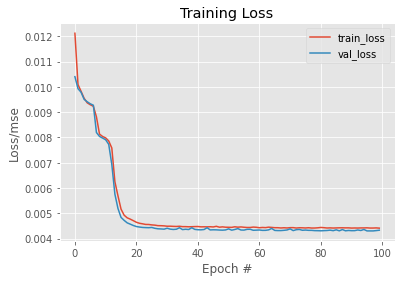

In [179]:
# Muestro gráfica de modelo
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss/mse")
plt.legend()

In [185]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model_num.evaluate(X_test_norm_num, Y_num_test, batch_size=64, verbose=1)
print('Test loss:', predictions[0])
print('Test accuracy:', predictions[1])

[INFO]: Evaluando red neuronal...
27/27 [==============================] - 0s 4ms/step - loss: 8294.5566 - mae: 63.2977
Test loss: 8294.556640625
Test accuracy: 63.297698974609375


**Modelo Imagenes**

In [188]:
# nos quedamos con los datos para los que hemos podido encontrar imágenes
Y = data["Price"]
data_with_imgs = data.drop(['Thumbnail Url','Price'], axis=1)
data_with_imgs.shape

(8586, 10)

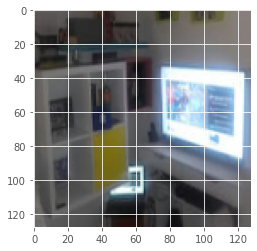

In [189]:
# comprobamos una de las imagenes
im = loaded_images[12,::]
plt.imshow(im)
plt.show()

In [190]:
#tamaño de los datos que contiene las imagenes
loaded_images.shape

(8586, 128, 128, 3)

In [191]:
#nos quedamos con 1000 registros
loaded_img_min = loaded_images[7586::]
data_with_img_min = data_with_imgs[7586::]
Y_img_min = Y[7586::]

loaded_img_min.shape

(1000, 128, 128, 3)

In [192]:
# hacemos el split de los datos de las imagenes
X_img_train, X_img_test, Y_img_train, Y_img_test = train_test_split(loaded_img_min, Y_img_min, test_size=0.2, random_state=1)
X_img_train, X_img_val, Y_img_train, Y_img_val = train_test_split(X_img_train, Y_img_train, test_size=0.25, random_state=1) 

In [193]:
# Normalizamos las imagenes
X_train_norm = X_img_train.astype('float32') / 255.
X_val_norm = X_img_val.astype('float32') / 255.
X_test_norm = X_img_test.astype('float32') / 255.

In [194]:
# Normalizamos la variable resultado
scaler3 = MinMaxScaler(feature_range=(0,1))
Y_train_norm = scaler3.fit_transform(Y_img_train.values.reshape(-1,1))
Y_val_norm = scaler3.fit_transform(Y_img_val.values.reshape(-1,1))
Y_test_norm = scaler3.fit_transform(Y_img_test.values.reshape(-1,1))

In [203]:
#Modelo imagenes
inputs = Input(shape=(128, 128, 3))

# Definimos una capa convolucional
x = Conv2D(64, kernel_size = (3,3), activation='relu')(inputs)

# Definimos una segunda capa convolucional
x = Conv2D(32, kernel_size = (3,3), activation='relu')(x)

x = Flatten()(x)
x = Dense(16, activation='relu')(x)
x = Dense(4, activation='relu')(x)

#esta linea está comentada para poder trabajar en el modelo hibirido
#par trabajar de manera individual hay que descomentarla
x = Dense(1, activation='linear')(x)

model_img = Model(inputs, x)

# Compilamos el modelo
model_img.compile(loss='mse',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['mae']) #, decay=1e-6

# Entrenamos el modelo. Yo pondría mas epochs pero me quede sin GPU y tarda una vida en ejecutarse
H1 = model_img.fit(X_train_norm, to_categorical(Y_train_norm),
          batch_size=128,
          shuffle=True,
          epochs=10,
          validation_data=(X_val_norm, to_categorical(Y_val_norm)))

# Evaluamos el modelo
scores = model_img.evaluate(X_test_norm, to_categorical(Y_test_norm))

print('Loss: %.3f' % scores[0])
print('Mae: %.3f' % scores[1])

Epoch 1/10
5/5 [==============================] - 43s 8s/step - loss: 8.1242 - mae: 1.9550 - val_loss: 0.3488 - val_mae: 0.4973
Epoch 2/10
5/5 [==============================] - 53s 11s/step - loss: 1.1136 - mae: 0.8865 - val_loss: 0.0657 - val_mae: 0.2086
Epoch 3/10
5/5 [==============================] - 49s 10s/step - loss: 0.5448 - mae: 0.5894 - val_loss: 0.0444 - val_mae: 0.1754
Epoch 4/10
5/5 [==============================] - 55s 10s/step - loss: 0.4324 - mae: 0.5349 - val_loss: 0.0641 - val_mae: 0.2105
Epoch 5/10
5/5 [==============================] - 42s 8s/step - loss: 0.3484 - mae: 0.5070 - val_loss: 0.1115 - val_mae: 0.2999
Epoch 6/10
5/5 [==============================] - 56s 11s/step - loss: 0.2961 - mae: 0.5004 - val_loss: 0.1730 - val_mae: 0.3953
Epoch 7/10
5/5 [==============================] - 44s 9s/step - loss: 0.2721 - mae: 0.5000 - val_loss: 0.2340 - val_mae: 0.4704
Epoch 8/10
5/5 [==============================] - 43s 9s/step - loss: 0.2638 - mae: 0.5000 - val_los

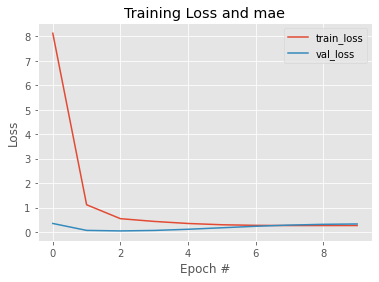

In [204]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H1.history["val_loss"], label="val_loss")
plt.title("Training Loss and mae")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()


**Modelo VGG16** 

In [205]:
#Reescalar los datos porque VGG16 las entradas tienes que ser con una shape determianda
input_shape1 = (48, 48, 3)

# ajustamos los tamaños de la imagen a la especificacion del modelo
X_train_resized1 = []
for img in X_train_norm:
  X_train_resized1.append(np.resize(img, input_shape1))

X_train_resized1 = np.array(X_train_resized1)
print(X_train_resized1.shape)

(600, 48, 48, 3)


In [206]:
# ajustamos los tamaños de la imagen a la especificacion del modelo
X_val_resized1 = []
for img in X_val_norm:
  X_val_resized1.append(np.resize(img, input_shape1))

X_val_resized1 = np.array(X_val_resized1)
print(X_val_resized1.shape)

(200, 48, 48, 3)


In [207]:
# ajustamos los tamaños de la imagen a la especificacion del modelo
X_test_resized1 = []
for img in X_test_norm:
  X_test_resized1.append(np.resize(img, input_shape1))

X_test_resized1 = np.array(X_test_resized1)
print(X_test_resized1.shape)

(200, 48, 48, 3)


In [208]:
#Creas el modelo
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(input_shape1))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [209]:
# permitimos que, además de la etapa de clasificación, se entrenen también el
# último bloque convolucional
for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable=False
  print('capa' + layer.name + 'congelada')


# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output

x = Flatten()(last)
x = Dense(128, activation='relu', name='fc4')(x)
x = Dropout(0.3)(x)
#x = Dense(1, activation='linear', name='prediction')(x)
model_cnn = Model(base_model.input, x)

# compilamos el modelo
model_cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])

# vemos la nueva estructura del modelo
model_cnn.summary()

capainput_10congelada
capablock1_conv1congelada
capablock1_conv2congelada
capablock1_poolcongelada
capablock2_conv1congelada
capablock2_conv2congelada
capablock2_poolcongelada
capablock3_conv1congelada
capablock3_conv2congelada
capablock3_conv3congelada
capablock3_poolcongelada
capablock4_conv1congelada
capablock4_conv2congelada
capablock4_conv3congelada
capablock4_poolcongelada
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
      

In [210]:
# comenzamos con el entrenamiento
epochs = 10
batch_size = 128

# como entrenariamos normalmente
H3 = model_cnn.fit(X_train_resized1, Y_train_norm,
          batch_size=batch_size,
          validation_data=(X_val_resized1, Y_val_norm),
          epochs=epochs)

Epoch 1/10
5/5 [==============================] - 28s 6s/step - loss: 0.2057 - mae: 0.2633 - val_loss: 0.0593 - val_mae: 0.1754
Epoch 2/10
5/5 [==============================] - 27s 6s/step - loss: 0.0661 - mae: 0.1567 - val_loss: 0.0324 - val_mae: 0.1299
Epoch 3/10
5/5 [==============================] - 27s 6s/step - loss: 0.0287 - mae: 0.1070 - val_loss: 0.0241 - val_mae: 0.1091
Epoch 4/10
5/5 [==============================] - 29s 6s/step - loss: 0.0164 - mae: 0.0843 - val_loss: 0.0230 - val_mae: 0.1044
Epoch 5/10
5/5 [==============================] - 27s 6s/step - loss: 0.0136 - mae: 0.0742 - val_loss: 0.0243 - val_mae: 0.1072
Epoch 6/10
5/5 [==============================] - 27s 6s/step - loss: 0.0129 - mae: 0.0701 - val_loss: 0.0228 - val_mae: 0.1017
Epoch 7/10
5/5 [==============================] - 27s 5s/step - loss: 0.0127 - mae: 0.0698 - val_loss: 0.0230 - val_mae: 0.1019
Epoch 8/10
5/5 [==============================] - 28s 6s/step - loss: 0.0125 - mae: 0.0686 - val_loss: 0

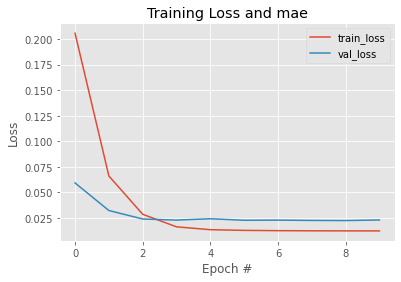

In [211]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H3.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H3.history["val_loss"], label="val_loss")
plt.title("Training Loss and mae")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

In [212]:
# comprobamos el accuracy y el loss en el test set
scores = model_cnn.evaluate(X_test_resized1, Y_test_norm, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

7/7 [==============================] - 5s 675ms/step - loss: 0.0118 - mae: 0.0664
Test loss: 0.011796078644692898
Test accuracy: 0.06636511534452438


**Modelo Hibrido**

Está sin acabar no he conseguido hacerlo funcionar.
He seguido los pasos del post que nos pasate como ejemplo

In [213]:
# obtenemos los modelos que con anterioridad teníamos implementados
mlp = model_num
cnn = model_cnn
# creamos la entrada conbinada con las salidas de los dos modelos
combinedInput = concatenate([mlp.output, cnn.output])

#creamos la capa propia del modelo hibrido 
x_h = Dense(4, activation="relu")(combinedInput)
x_h = Dense(1, activation="linear")(x_h)

model_h = Model(inputs=[mlp.input, cnn.input], outputs=x_h)

In [214]:
#tenido que hacer esto aquí porque para el modelo numérico no utilicé 1000 registro sino todo
X_train_min, X_test_min, Y_train_min, Y_test_min = train_test_split(data_with_img_min, Y_img_min, test_size=0.2, random_state=1)
X_train_min, X_val_min, Y_train_min, Y_val_min = train_test_split(X_train_min, Y_train_min, test_size=0.25, random_state=1)

In [215]:
#compilamos el modelo
opt = Adam(learning_rate=1e-3, decay=1e-3 / 8)
model_h.compile(loss="mse", optimizer=opt)

# entrenamos el modelo
print("[INFO] training model...")
model_h.fit(
	x=[X_train_min, X_train_resized1], y=Y_train_min,
	validation_data=([X_val_min, X_val_resized1], Y_val_min),
	epochs=10, batch_size=8) #200

#hacemos el predict del modelo 
print("[INFO] predicting house prices...")
preds = model_h.predict([X_test_min, X_test_resized1])

[INFO] training model...
Epoch 1/10


ValueError: ignored